## Below, we will build a Non-Naive Bayes Classifier Model
The Naive Bayes Classifier Model *** Need to write up.


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import multivariate_normal as mvn
import seaborn as sns

%matplotlib inline

In [64]:
cd \Users\rstbb\Documents\Techfield-Datascience\Datasets\

C:\Users\rstbb\Documents\Techfield-Datascience\Datasets


In [65]:
data_train = pd.read_csv("usps_digit_recognizer.csv")
data_test = pd.read_csv("usps_digit_recognizer.csv")

In [66]:
data_train.shape

(42000, 785)

#### Below, we le X be all the columns except the last one, and set y equal to that last column. The last columns contains the identifiers man = 1 or woman = 0. 

In [67]:
X = data_train.iloc[:,1:]
y = data_train.label
label = sorted(y.unique())

In [68]:
label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [69]:
X.shape

(42000, 784)

In [70]:
y.shape

(42000,)

In [71]:
label = sorted(y.unique())
plt.figure(figsize=(9,9))
for i in label:
    plt.subplot(1,10, i+1)
    img = np.array( X[y==i][1:2] ).reshape(28,28)
    plt.imshow(img)

In [72]:
X = X.to_numpy()
y = y.to_numpy()

In [73]:
class GaussNB():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            N_k, D = X.shape
            mu_k = X_k.mean(axis=0)
            self.likelihoods[k] = {"mean": mu_k, "cov":(1/(N_k -1))*np.matmul((X_k).T,X_k - mu_k) + epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [74]:
gnb = GaussNB()

In [75]:
gnb.fit(X,y)
y_hat = gnb.predict(X)

In [76]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [77]:
print(f"Accuracy: {accuracy(y, y_hat):0.3f}")

Accuracy: 0.905


Text(0.5, 42.0, 'Predicted label')

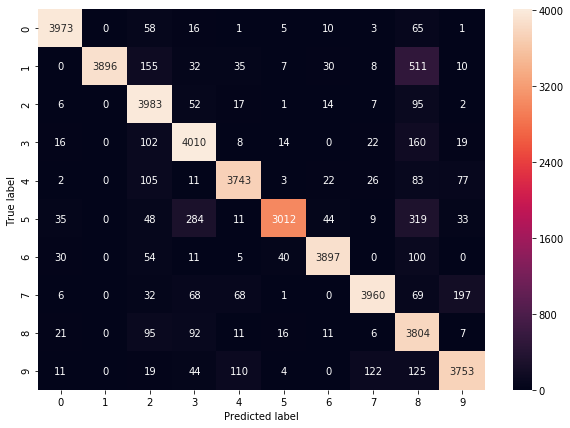

In [78]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')